In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Data Collection and Processing

In [3]:
heart_data = pd.read_csv('heart_disease_high_accuracy.csv')

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,60,1,1,135,207,0,1,93,0,0.095136,1,0,3,1
1,47,1,3,138,203,0,0,149,1,3.615743,0,2,3,1
2,48,1,0,120,178,0,1,154,1,1.094654,1,0,2,1
3,63,0,3,135,257,0,1,176,1,0.037558,1,0,2,1
4,42,0,2,129,224,0,1,137,0,0.125221,1,0,2,1


In [7]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
9995,51,0,3,128,306,1,1,155,1,0.138537,1,1,3,1
9996,52,0,2,141,228,0,1,180,1,0.183114,1,2,2,1
9997,55,1,1,119,343,0,0,136,0,0.205714,1,1,2,1
9998,56,0,1,130,197,0,0,162,0,2.651804,1,0,3,1
9999,49,1,0,143,183,0,0,117,0,0.856944,0,0,2,1


In [9]:
heart_data.shape

(10000, 14)

In [11]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       10000 non-null  int64  
 1   sex       10000 non-null  int64  
 2   cp        10000 non-null  int64  
 3   trestbps  10000 non-null  int64  
 4   chol      10000 non-null  int64  
 5   fbs       10000 non-null  int64  
 6   restecg   10000 non-null  int64  
 7   thalach   10000 non-null  int64  
 8   exang     10000 non-null  int64  
 9   oldpeak   10000 non-null  float64
 10  slope     10000 non-null  int64  
 11  ca        10000 non-null  int64  
 12  thal      10000 non-null  int64  
 13  target    10000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.1 MB


In [13]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,54.467300,0.565800,1.482200,129.651900,245.281200,0.148300,0.405100,149.46540,0.300200,0.991310,0.940000,0.720800,2.251800,0.937600
std,9.938874,0.495676,1.028294,15.061348,49.285816,0.355415,0.490936,25.36212,0.458368,0.986962,0.669212,0.910456,0.625648,0.241893
min,21.000000,0.000000,0.000000,66.000000,82.000000,0.000000,0.000000,51.00000,0.000000,0.000018,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,1.000000,120.000000,212.000000,0.000000,0.000000,133.00000,0.000000,0.284023,0.000000,0.000000,2.000000,1.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,149.00000,0.000000,0.679985,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,279.000000,0.000000,1.000000,166.00000,1.000000,1.380281,1.000000,1.000000,3.000000,1.000000
max,93.000000,1.000000,3.000000,192.000000,462.000000,1.000000,1.000000,258.00000,1.000000,8.845173,2.000000,3.000000,3.000000,1.000000


In [17]:
heart_data['target'].value_counts()

target
1    9376
0     624
Name: count, dtype: int64

In [19]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [21]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0      60    1   1       135   207    0        1       93      0  0.095136   
1      47    1   3       138   203    0        0      149      1  3.615743   
2      48    1   0       120   178    0        1      154      1  1.094654   
3      63    0   3       135   257    0        1      176      1  0.037558   
4      42    0   2       129   224    0        1      137      0  0.125221   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
9995   51    0   3       128   306    1        1      155      1  0.138537   
9996   52    0   2       141   228    0        1      180      1  0.183114   
9997   55    1   1       119   343    0        0      136      0  0.205714   
9998   56    0   1       130   197    0        0      162      0  2.651804   
9999   49    1   0       143   183    0        0      117      0  0.856944   

      slope  ca  thal  
0         1   0     3  
1         0   2

In [23]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: target, Length: 10000, dtype: int64


In [25]:
#Splitting the Data into Training data & Test Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(10000, 13) (8000, 13) (2000, 13)


In [31]:
#Model Training #Logistic Regression

In [33]:
model = LogisticRegression()

In [35]:
model.fit(X_train, Y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
#Model Evaluation #Accuracy Score

In [39]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [41]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.965375


In [43]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [45]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9695


In [47]:
#Building a Predictive System

In [49]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [51]:
import joblib
joblib.dump(model, 'LogisticRegression_model.pkl')

['LogisticRegression_model.pkl']

In [53]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = heart_data.drop(columns=["target"])  # Adjust "target" if your dataset has a different label column
y = heart_data["target"]  # Replace "target" with the actual target column name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


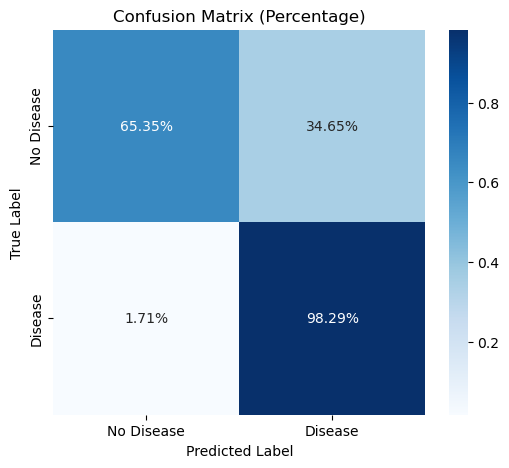

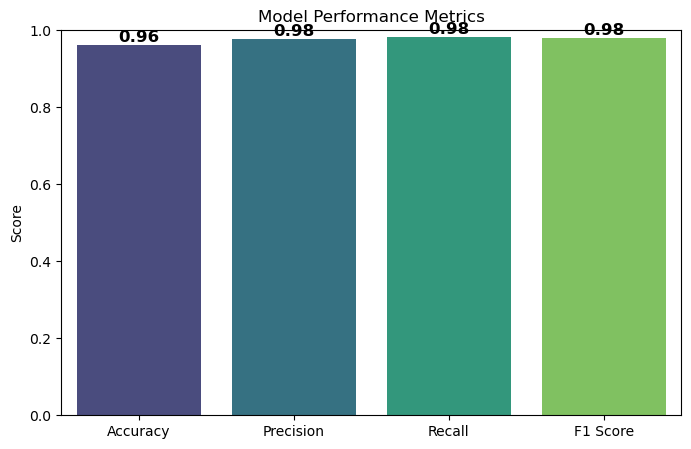

Classification Report:
               precision  recall  f1-score  support
0                  0.72    0.65      0.69   127.00
1                  0.98    0.98      0.98  1873.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.85    0.82      0.83  2000.00
weighted avg       0.96    0.96      0.96  2000.00


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Compute metrics
report = classification_report(y_test, y_pred, output_dict=True)

# Extracting accuracy, precision, recall, and f1-score
accuracy = report["accuracy"]
precision = report["1"]["precision"]
recall = report["1"]["recall"]
f1_score = report["1"]["f1-score"]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix with percentages
plt.figure(figsize=(6,5))
sns.heatmap(cm_percentage, annot=True, fmt=".2%", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentage)")
plt.show()

# Plot Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(8,5))
ax = sns.barplot(x=metrics, y=values, hue=metrics, palette="viridis", legend=False)

plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")

# Add labels on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

# Display Classification Report as DataFrame
df_report = pd.DataFrame(report).T
df_report = df_report.round(2)  # Round values for better readability
print("Classification Report:\n", df_report)